In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Lifecycle of Data Science Project
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

### Data Analysis

#### In Data Analysis we Analyze the given data to understand its dynamics:
#### few of the parameter checks that are performed, include:
1. Missing Values
2. All the Numerical Variable
3. Distribution of Numerical Variables
<!-- 4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent features(SalePrice) -->

### Let's understand through example:

### Missing values

### Type of missing data:

### Missing Completely At Random(MCAR)
MCAR - there is no relationship between the data missing and other values
<br><br>

### Missing Data Not At Random(MNAR) -- Systematic missing values
Relationship exists between the missing data and other observation

### Imputation Techniques

Imputation is the process of filling in missing or incomplete data values with estimated or predicted values. This is done to ensure that the dataset is complete and ready for analysis.

Some of the commonly used imputation techniques include:

#### 1. MEAN / MEDIAN / MODE REPLACEMENT
#### 2. RANDOM SAMPLE IMPUTATION
#### 3. CAPTURING NaN VALUE WITH A NEW FEATURE
#### 4. END OF DISTRIBUTION IMPUTATION
#### 5. ARBITRARY IMPUTATION
#### 6. FREQUENT CATEGORIES IMPUTATION

### Mean, median, Mode:
Assumption: Data is missing completely at random.<br>
Operation:<br>
Replacing the NaN with most frequently occurring variable based on mean, median or mode.

### Random Sample imputation:
Assumption: Data is missing completely at random.<br>
Operation:<br>
Taking random observation from given dataset and replace the NaNs with these observations.

### End of Distribution:
Assumption: Data not missing completely at random.<br>
Operation:<br>
Replace NaN in the dataset with the values at the extremes (outliers)
This technique takes outliers into consideration.

### Capturing NaN with a new feature:
Assumption: Data NOT missing completely at random.<br>
Operation:<br>
Replace the NaN in dataset with a new feature. ex: 0 and 1
Can also be replaced with a variable (for categorical variable). ex: “Missing”.

### Arbitrary Value Imputation:
Operation:<br>
Arbitrary value should not be the most frequent values.
Replace the NAN value with arbitrary value such as the extreme values in the dataset or any other values other than mean, median or mode.

### Frequent Category Imputation:
Assumption: The amount of missing value is low.<br>
Operation:<br>
Find the number of missing values.
If there are few missing values: replace the missing values with most frequent value.

### Let's understand through example

#### Imputing with MEAN / MEDIAN / MODE 

##### When to apply: 
Mean/ median impution has the assumption that the data is missing completely at random(MCAR).

We solve this by replacing the NaN with the most frequent occurance of the variable 

In [3]:
df = pd.read_csv('./dataset/titanic_train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
# find percentage of missing value
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
def impute_nan1(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    
median = df.Age.median()
print("Median value: ",median)
impute_nan1(df, 'Age', median)
df.head()

Median value:  28.0


,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


### In the following graph we can see that the median_Age does not properly overlap with the actual age distribution of the dataset, hence we need to try other imputation methods

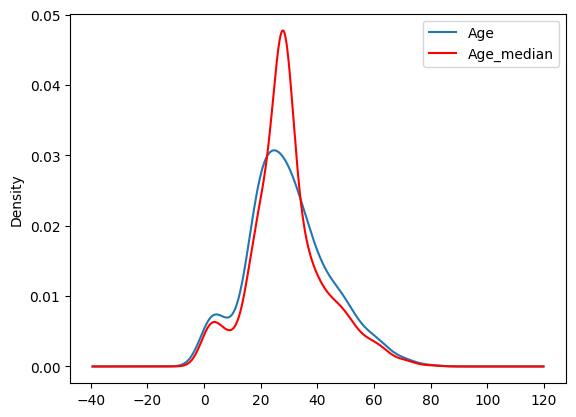

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Imputing with Random Values

#### first drop the NaN value from the Age column
#### out of the non-NaN values create samples as much as the null values.
#### inside the samples you can define the number of samples required.
#### in our case we have defined the number inside the sample equal to the number of NaN values.

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
def impute_nan2(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median) #fill all nan values with median of the age column
    df[variable+'_random'] = df[variable]
    
    #it will have random sample to fill the nan values
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    #replace with a random value at the "INDEX", where it is null.
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample

In [8]:
impute_nan2(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


### In this case, we see a perfect overlap, of the randmoly imputated values with the age distribution, this indicates that the imputation is properly performed

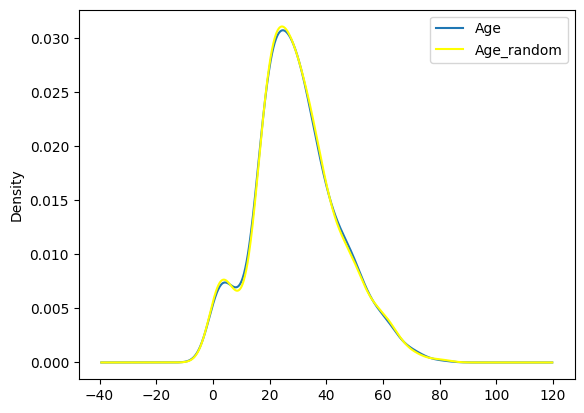

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='yellow')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Imputing with end of distribution values

In [10]:
df.Age.mean()

29.69911764705882

### here we pickup the value after the 3rd standard deviation
### the mean of the df[Age] is 29
### the value after the 3rd deviation is 73.27(right end of the data distribution)

In [11]:
extreme = df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

In [12]:
def impute_nan3(df, variable, median, extreme):
    
    #create a new feature column and fill the NaN value with the extreme value
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True) # filling the NaN value in Age column with median value 

In [13]:
impute_nan3(df, 'Age', df.Age.median(), extreme)

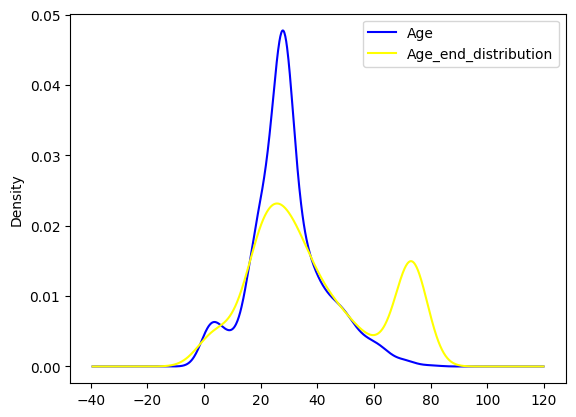

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde', ax=ax, color='blue')
df.Age_end_distribution.plot(kind='kde', ax=ax, color='yellow')
# df.Age_mean_val.plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Scaling techniques:
#### Scaling is a crucial preprocessing step in data science to ensure that features in a dataset are on a comparable scale, typically between 0 and 1 or with a mean of 0 and a standard deviation of 1. This is essential because many machine learning algorithms are sensitive to the magnitude of features. Without scaling, variables with larger values can dominate the learning process, leading to biased model outcomes

#### Min Max Scaling
##### Min Max scaling scales the values between 0 - 1
##### ((X - X_min)/X_max - X_min)

In [6]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)
df_minmax.head()

,Survived,Age,Fare
0,0.0,0.271174,0.014151
1,1.0,0.472229,0.139136
2,1.0,0.321438,0.015469
3,1.0,0.434531,0.103644
4,0.0,0.434531,0.015713


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

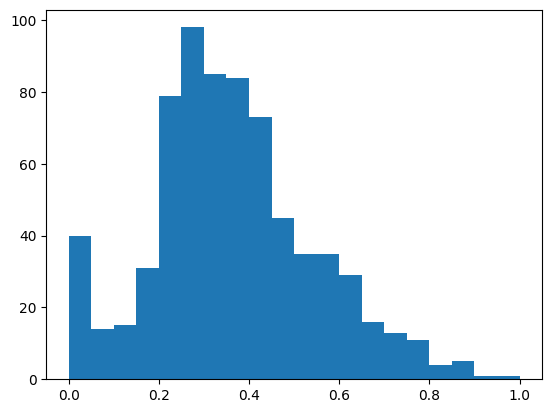

In [8]:
plt.hist(df_minmax['Age'], bins=20)

### StandardScaler is a popular scaling technique in data science that transforms features to have a mean of 0 and a standard deviation of 1.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [11]:
pd.DataFrame(df_scaled)

,0,1,2
0,-0.789272,-0.530377,-0.502445
1,1.266990,0.571831,0.786845
2,1.266990,-0.254825,-0.488854
3,1.266990,0.365167,0.420730
4,-0.789272,0.365167,-0.486337
...,...,...,...
886,-0.789272,-0.185937,-0.386671
887,1.266990,-0.737041,-0.044381
888,-0.789272,NaN,-0.176263
889,1.266990,-0.254825,-0.044381


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([-2.01697919, -1.74287393, -1.46876867, -1.1946634 , -0.92055814,
        -0.64645288, -0.37234762, -0.09824236,  0.1758629 ,  0.44996816,
         0.72407342,  0.99817868,  1.27228395,  1.54638921,  1.82049447,
         2.09459973,  2.36870499,  2.64281025,  2.91691551,  3.19102077,
         3.46512604]),
 <BarContainer object of 20 artists>)

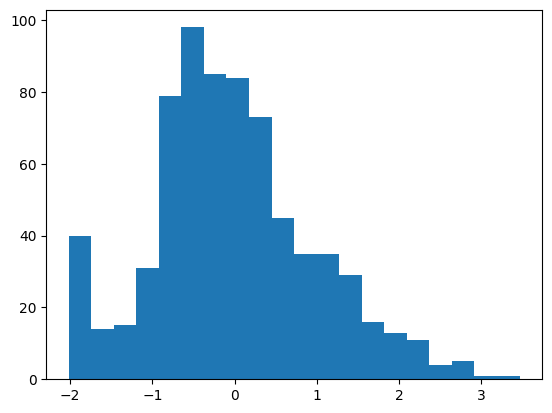

In [12]:
plt.hist(df_scaled[:,1], bins=20)

### Robust Scaler

#### It is used to scale the feature to median and quantiles.
#### Scaling using the median and quantiles consist of subtracting the median to all 
#### the observations, and then dividing by the interquantile difference.
#### The interquantile difference is the difference between the 75th and 25th quantile.

### IQR = 75th quantile - 25th quantile

### X_scaled = (X - X_median)/ IQR

In [13]:
from sklearn.preprocessing import RobustScaler

In [14]:
scaler = RobustScaler()
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [15]:
df_robust_scaler.head()

,Survived,Age,Fare
0,0.0,-0.335664,-0.312011
1,1.0,0.559441,2.461242
2,1.0,-0.111888,-0.282777
3,1.0,0.391608,1.673732
4,0.0,0.391608,-0.277363


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

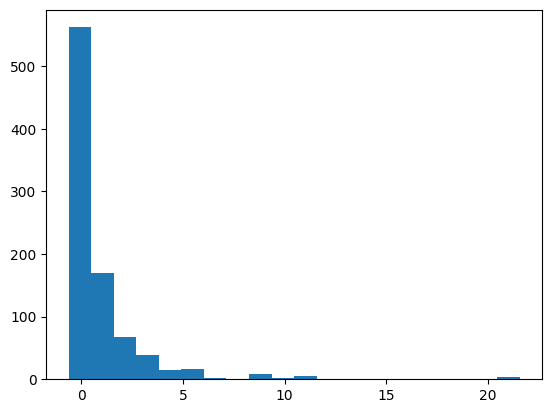

In [17]:
plt.hist(df_robust_scaler['Fare'], bins=20)

## Flight Price Prediction dataset

### In this we will understand how to handle categorical variables and temporal variables in the dataset

### Let's explore the data

In [18]:
import pandas as pd

In [19]:
df = pd.read_excel('./dataset/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Most of the features in the dataset are categorical data: <br>
Airline<br>
Source<br>
Destination<br>
Route<br>
Total_Stops<br>

The price column is the target column and is a <b>continuous variable<b>.

## Categorical Variables

Categorical variables are attributes that represent distinct categories or groups. <br>
They are used to classify data into discrete classes or labels. <br>
Example: colors, day of the weeek, vehicle brands

### Types of categorical variables

<h3>Categorical variables are of 2 types:</h3><br>
<ul>
    <li><b>Nominal:</b></li>
    [order/Rank doesn't matter]<br>
    Example: Name of Students, Type of color<br><br>
    <li><b>Ordinal</b></li>
    [order/Rank matters]<br>
    Example: Salary of Employees, Day of the week
</ul>

<p>Since machine learning algorithms cannot process categorical data it is required to convert it to numerical format.</p>
<p>Depending upon the type of categorical data, following encoding techniques can be performed on the dataset:</p><br>
<ul>
    <li>Nominal Encoding:</li>
    <b>One Hot Encoding</b><br>
    <b>Mean Encoding</b><br><br>
    <li>Categorical Encoding:</li>
    <b>Label Encoding</b><br>
    <b>TargetGuided Encoding</b>
</ul>

### Let's take example of each techniques using our dataset 

### Label Encoding

Assigning a unique numerical label to each category within a categorical variable. This is suitable for ordinal data, where there's a natural order among categories.

In [21]:
# total count for each category in the "Total_Stops" column

df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [22]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [23]:
df['Total_Stops'].fillna(0, inplace=True)
# Convert the column to integers
df['Total_Stops'] = df['Total_Stops'].astype(int)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


### One Hot Encoding

### Creating binary columns for each category, where a '1' represents the presence of a category, and '0' indicates its absence. This is useful for nominal data without inherent order.

In [24]:
# lets that the destination columns
# frequency of each category

df["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [25]:
# perform OneHotEncoding
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
